## Import the wrapper and instantiate it with some untrained models

In [2]:
from analysis import ModelAnalysis
model_analysis = ModelAnalysis(
    models=ModelAnalysis.ALL_MODELS_UNTRAINED, 
    y='suicides_per_100k_pop')


## Train the models or load the pretrained stored models

In [ ]:
# train the models
model_analysis.train()

## here we just load the pretrained ones
# model_analysis.load_models()

In [3]:
# make predictions for all trained models
# the results are stored in the model_analysis class
_ = model_analysis.predict(split='train')
_ = model_analysis.predict(split='val')
_ = model_analysis.predict(split='test')


NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

## Evaluate the predictions using different metrics

In [4]:
# test other metrics
from sklearn.metrics import (max_error, mean_absolute_error,
                             mean_squared_error, median_absolute_error, r2_score)
from utils import root_mean_squared_error

for metric in [mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error]:
    print(f"{metric.__name__:#^32}")
    _ = model_analysis.evaluate(metric=metric, verbose=True)  # default split is test
    _ = model_analysis.evaluate(metric=metric, split='train', verbose=True)
    print()


#######mean_squared_error#######
LinearRegression: 261669.89044005363
DecisionTreeRegressor: 61395.830917874395
MLPRegressor: 20875.565733144154
XGBRegressor: 26611.18310711924
RandomForestRegressor: 56969.52066183573
KNeighborsRegressor: 130015.47671497581
LinearRegression: 406197.1207721578
DecisionTreeRegressor: 0.0
MLPRegressor: 7753.012272579937
XGBRegressor: 112.44250786330518
RandomForestRegressor: 4829.99133561478
KNeighborsRegressor: 88280.94500302846

####root_mean_squared_error#####
LinearRegression: 511.53679285077203
DecisionTreeRegressor: 247.78182120138354
MLPRegressor: 144.48379055501056
XGBRegressor: 163.12934471492014
RandomForestRegressor: 238.6828872412845
KNeighborsRegressor: 360.57658924974015
LinearRegression: 637.3359559699718
DecisionTreeRegressor: 0.0
MLPRegressor: 88.05119120477552
XGBRegressor: 10.603891166138267
RandomForestRegressor: 69.49813908022847
KNeighborsRegressor: 297.1210948469133

############r2_score############
LinearRegression: 0.6009863330836

## Visualizations

### Visualize the predicitons

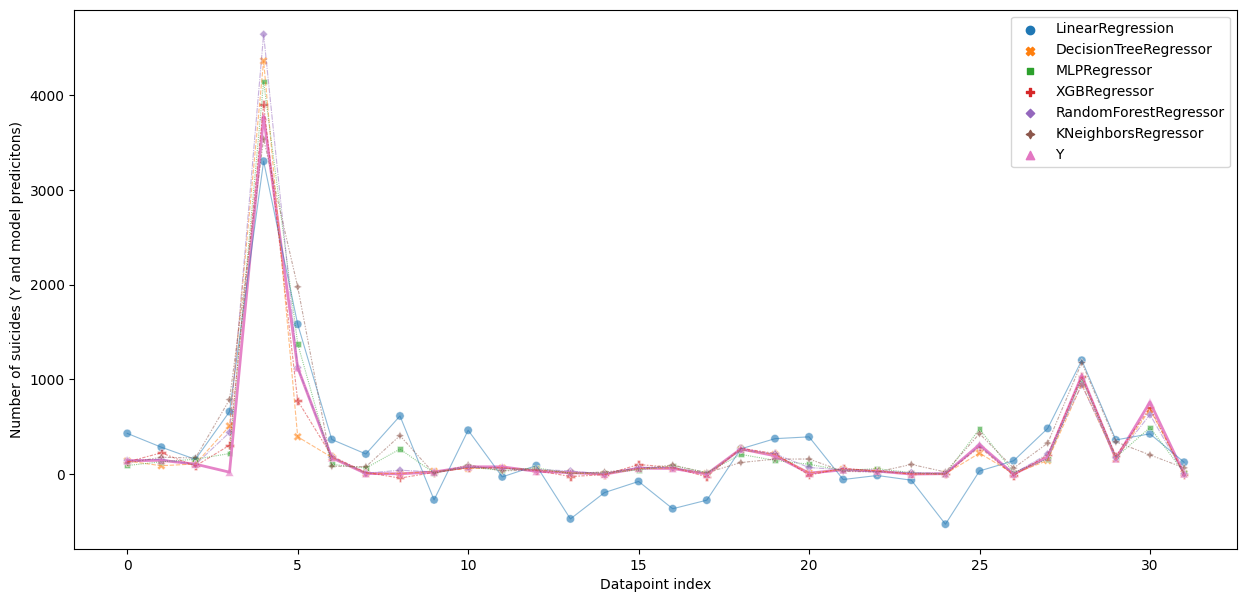

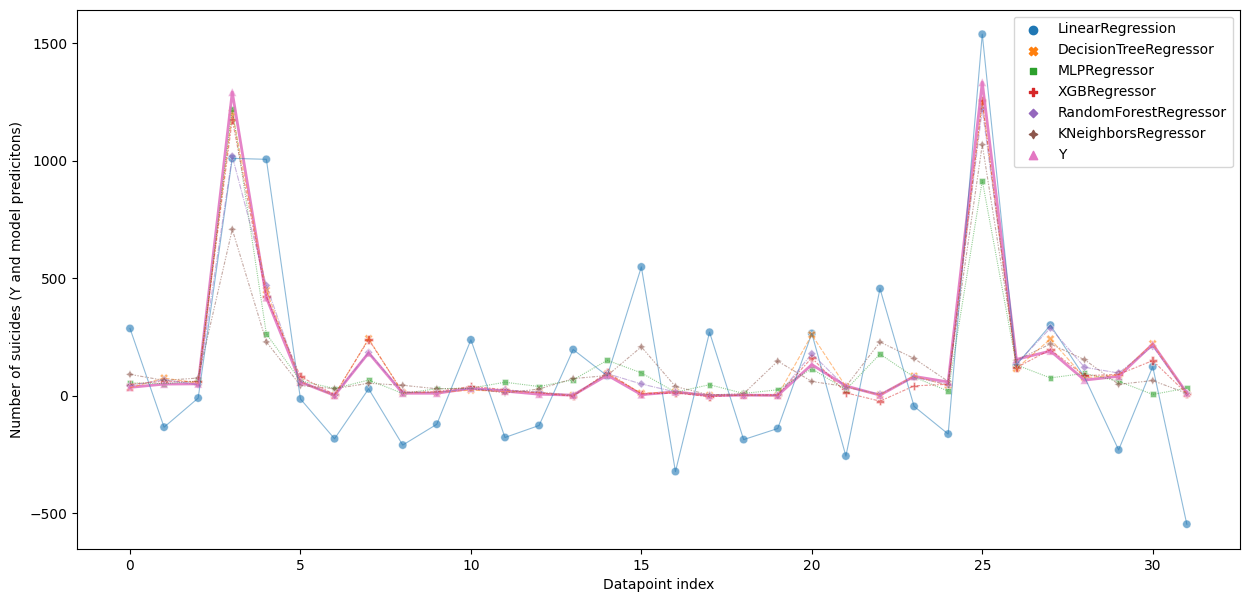

In [5]:
model_analysis.visualize_predictions()
model_analysis.visualize_predictions(sample_range=(100,132))

### Visualize the accuracies based on different metrics

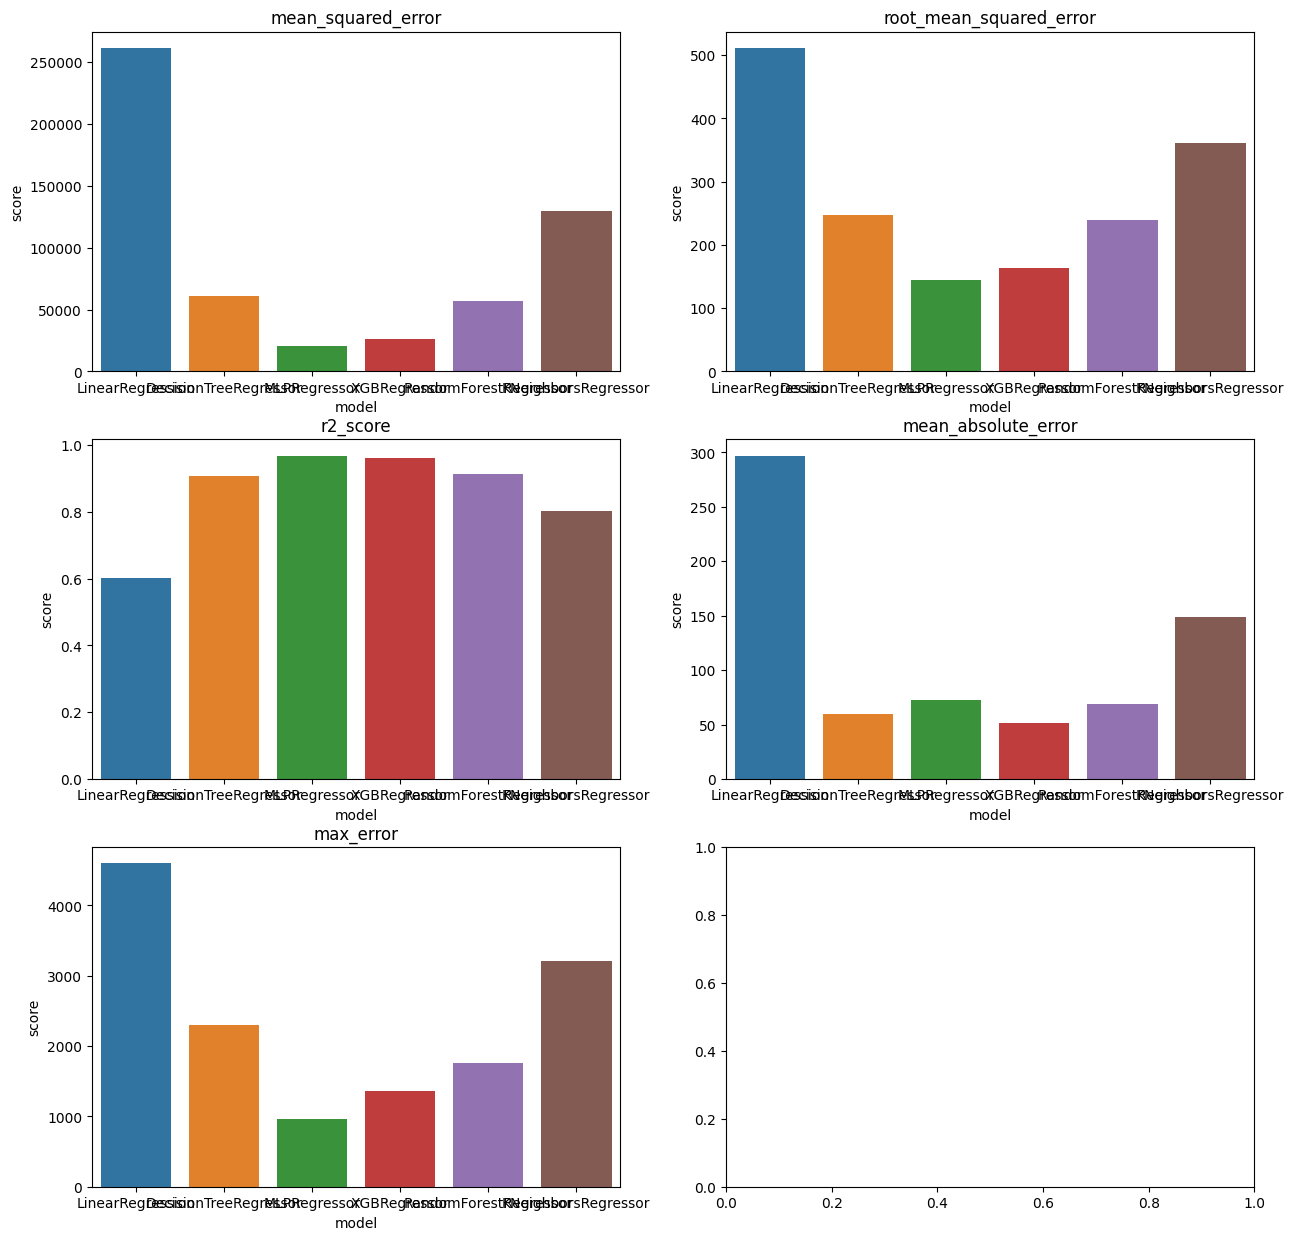

In [8]:
model_analysis.visualize_metrics(split='test')

## We can save the models to a file to reuse them later without having to retrain them

In [ ]:
model_analysis.save_models()